In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read(filename):
    sep = '\t' if filename.endswith('.tsv') else ','
    data = pd.read_csv(filename, sep=sep)
    data['Time'] = data.TimeNanoseconds.map(lambda ns: np.timedelta64(ns, 'ns'))
    return data[['Iteration', 'Time', 'Fatigue']].set_index('Iteration')

greedy = read('./out/log-04-844316d.tsv')

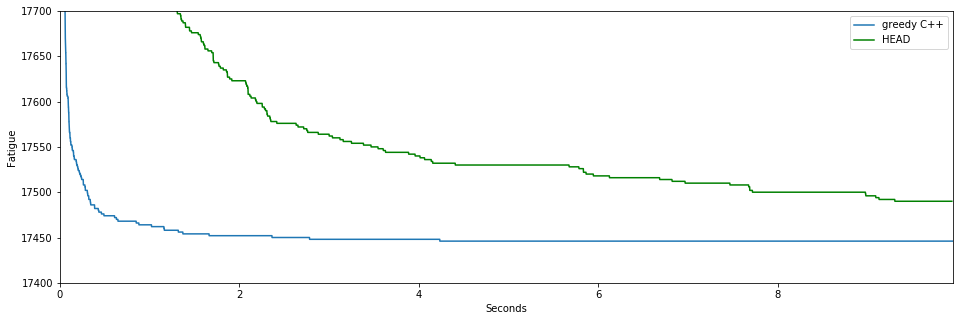

In [3]:
data = read('./out/log-04.csv')

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(greedy.Time.dt.total_seconds(), greedy.Fatigue, label='greedy C++')
ax.plot(data.Time.dt.total_seconds(), data.Fatigue, label='HEAD', c='g')
ax.set_ylim(17400, 17700)
ax.margins(0)
ax.set_xlabel('Seconds')
ax.set_ylabel('Fatigue')
ax.legend()
plt.show()